In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras,gc,time
from keras.layers import *
from keras.models import Sequential,Model

Using TensorFlow backend.


In [2]:
!ls ..

HC_TOT.nc   PIIC				 proyecto	thesis-ivan.pdf
NOx_TOT.nc  PIICM_18-QUI-INF-MEC-CON-FIRMAS.pdf  recurrentshop


### Lectura de archivos NETCDF

In [26]:
from netCDF4 import Dataset
#dataset = Dataset('../HC_TOT.nc',mode='r') 
dataset = Dataset('../NOx_TOT.nc',mode='r') 
print("Dimensiones: ",dataset.dimensions.keys() )
dataset

Dimensiones:  odict_keys(['longitude', 'latitude'])


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    crs: +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0
    crs_format: PROJ.4
    Conventions: CF-1.4
    created_by: R, packages ncdf4 and raster (version 2.6-7)
    date: 2018-04-13 06:45:48
    dimensions(sizes): longitude(1157), latitude(3913)
    variables(dimensions): float64 longitude(longitude), float64 latitude(latitude), float32 NOxTOT(latitude,longitude)
    groups: 

In [8]:
dataset.variables

OrderedDict([('longitude', <class 'netCDF4._netCDF4.Variable'>
              float64 longitude(longitude)
                  units: degrees_east
                  long_name: longitude
              unlimited dimensions: 
              current shape = (1157,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('latitude', <class 'netCDF4._netCDF4.Variable'>
              float64 latitude(latitude)
                  units: degrees_north
                  long_name: latitude
              unlimited dimensions: 
              current shape = (3913,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('NOxTOT', <class 'netCDF4._netCDF4.Variable'>
              float32 NOxTOT(latitude, longitude)
                  units: ton/yr
                  _FillValue: -3.4e+38
                  missing_value: -3.4e+38
                  long_name: NOxTOT
                  min: 0.0
                  max: 282.272216797
          

<img src="https://keydifferences.com/wp-content/uploads/2017/02/latitude-vs-longitude2.jpg">

In [9]:
lons = dataset.variables['longitude']
lons_data = lons[:]
print("Longitude unit: ",lons.units)
print("Longitude filling value: ",lons_data.fill_value)
lats = dataset.variables['latitude']
lats_data = lats[:]
print("Latitude unit: ",lats.units)
print("Latitude filling value: ",lats_data.fill_value)

#measure = dataset.variables['HCTOT']
measure = dataset.variables['NOxTOT']
measure_data = measure[:]
print("HC TOT unit: ",measure.units)
print("HC TOT min value: ",measure.min)
print("HC TOT max value: ",measure.max)
print("HC TOT shape: ",measure.shape)
print("HC TOT filling value: ",measure_data.fill_value)

dataset.close()
##medir granularidad

Longitude unit:  degrees_east
Longitude filling value:  1e+20
Latitude unit:  degrees_north
Latitude filling value:  1e+20
HC TOT unit:  ton/yr
HC TOT min value:  0.0
HC TOT max value:  282.272216797
HC TOT shape:  (3913, 1157)
HC TOT filling value:  1e+20


In [10]:
diferencias = []
for i in range(len(lons_data)-1):
    diferencias.append(lons_data[i+1]-lons_data[i])
print("La media de precision/variacion de longitud es %f grados con desviacion estandar %f "%(np.mean(diferencias),np.std(diferencias)))

La media de precision/variacion de longitud es 0.010000 grados con desviacion estandar 0.000000 


In [11]:
diferencias = []
for i in range(len(lats_data)-1):
    diferencias.append(lats_data[i]-lats_data[i+1]) #latitud va hacia el otro lado
print("La media de precision/variacion latitude es %f grados con desviacion estandar %f: "%(np.mean(diferencias),np.std(diferencias)))

La media de precision/variacion latitude es 0.010000 grados con desviacion estandar 0.000000: 


La razón de un grado en latitud o longitud en santiago es a 1km x 1km

In [79]:
measure_data[0,1]
for i in range(len(measure_data)):
    for j in range(len(measure_data[i])):
        if measure_data[i,j] != 0:
            print(measure_data[i,j])

0.0005397285
0.0014427376
8.9185174e-05
0.00022598845
0.0009866524
0.0014919598
0.000574676
0.0012160084
4.526529e-05
0.0012892677
0.0011706996
0.0012172078
0.00043778017
0.0007978256
0.0010336196
0.00034166643
0.0016568877
0.0006629184
0.000675496
0.0010876731
0.0027509672
0.0023350262
0.001542713
0.00033734372
0.001316437
0.000525031
0.0029635078
0.0022525212
0.001844786
0.0008738935
0.00083076477
0.000799308
0.00072082947
0.0024007226
0.0012805494
4.521133e-05
0.0015162131
0.00033658123
0.002031698
8.853974e-05
0.0014837193
0.0003399908
0.0014843446
0.0023674108
0.001321293
0.0009976781
0.0012823842
1.9833824e-05
0.0023674108
0.0007387751
0.0010919597
0.0011825991
0.00047992423
0.00093396934
0.0004173722
0.00095581403
0.00031135383
1.1436556e-05
0.0024036095
0.0011782185
0.00054099044
0.00117882
0.001215438
0.0013289723
0.0024283454
0.00025418395
0.0015182616
0.000193511
0.0006789594
0.0007467418
0.0021151537
0.00038285425
0.0011639042
0.00090778427
0.0015521101
0.0011351724
0.00091

KeyboardInterrupt: 

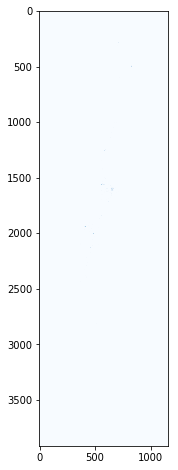

In [12]:
plt.figure(figsize=(16,8))
scaled_measure = (measure_data-np.min(measure_data))/(np.max(measure_data)-np.min(measure_data))#o y 1
plt.imshow(scaled_measure,cmap=plt.cm.Blues) #gray

hacer *match* con lugar geográfico.. (poner encima o preguntar)

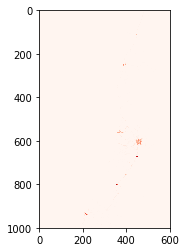

In [13]:
plt.imshow(scaled_measure[1000:2000,200:800],cmap=plt.cm.Reds)

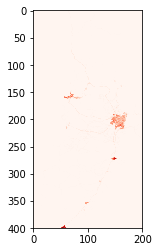

In [14]:
plt.imshow(scaled_measure[1400:1800,500:700],cmap=plt.cm.Reds)

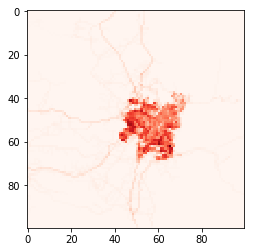

In [15]:
plt.imshow(scaled_measure[1550:1650,600:700],cmap=plt.cm.Reds)

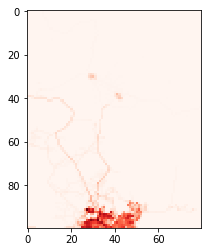

In [16]:
plt.imshow(scaled_measure[1500:1600,620:700],cmap=plt.cm.Reds)

In [ ]:
Revisar si Nox y HC son iguales o no...

In [31]:
from mpl_toolkits.basemap import Basemap
# Get some parameters for the Stereographic Projection
lon_0 = lons_data.mean()
lat_0 = lats_data.mean()

#revisar width o height
# lat_ts is latitude of true scale.
m = Basemap(width=5000000,height=3500000, resolution='l',projection='stere',
            lat_ts=50,lat_0=lat_0,lon_0=lon_0)

# satellite_height is the altitude of the camera.
h = 200.
m = Basemap(projection='nsper',lat_0=lat_0,lon_0=lon_0, satellite_height=h*1000.,resolution='l')

# projection, lat/lon extents and resolution of polygons to draw
#m = Basemap(projection='merc',llcrnrlon=-93.,llcrnrlat=35.,urcrnrlon=-73.,urcrnrlat=45.,resolution='i',lat_0=lat_0,lon_0=lon_0) 

In [32]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons_data, lats_data)
xi, yi = m(lon, lat)

In [ ]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(measure_data))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label("tons/year")

# Add Title
plt.title('Measure on Santiago')

plt.show()

/home/fmena/anaconda2/envs/py3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()


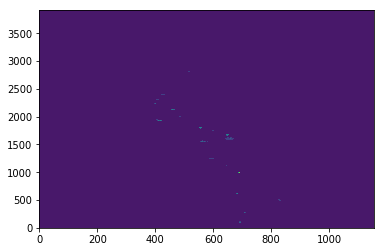

In [30]:
#print('shape=%s, type=%s, missing_value=%s' % \
#      (soilm.shape, type(soilm), soilmvar.missing_value))
import matplotlib.pyplot as plt
%matplotlib inline
cs = plt.contourf(measure_data)

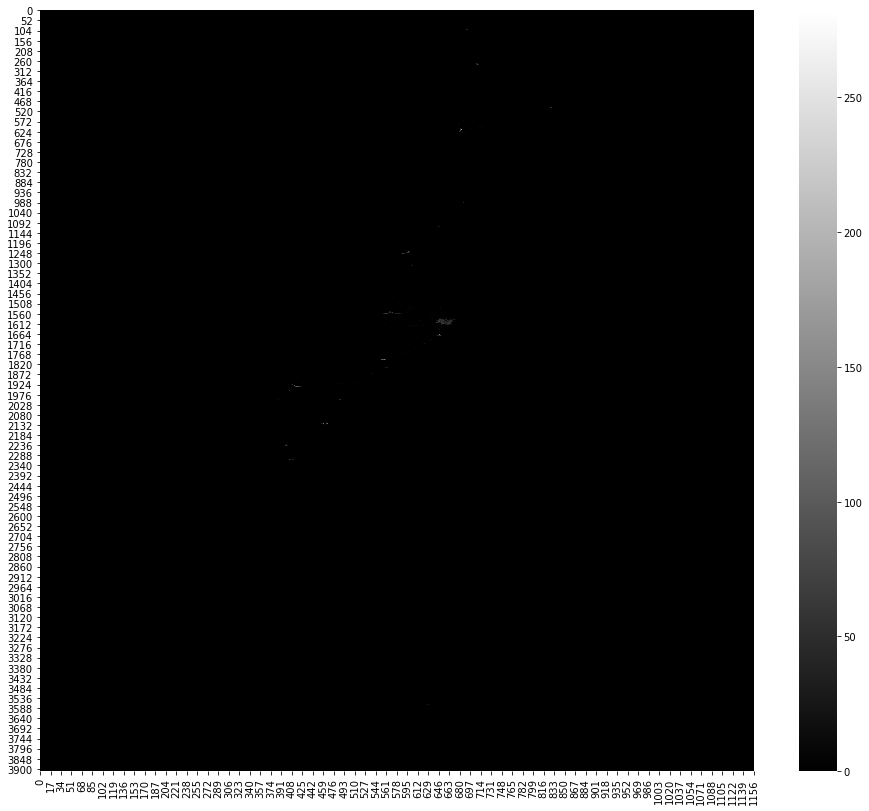

In [25]:
plt.figure(figsize=(16,14))
sns.heatmap(measure_data,cmap='gray')
plt.show()

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_global()
lon, lat = np.meshgrid(lons_data, lats_data)
cs = ax.pcolor(lon, lat, data)
# If roll not available
#cs = ax.pcolor(lon[:, :180], lat[:, :180], data[:, :180])
#cs = ax.pcolor(lon[:, 180:], lat[:, 180:], data[:, 180:])

# draw coastlines.
ax.coastlines()
ax.add_feature(cfeat.LAND)
plt.show()

### Cargar datos

In [7]:
folder = "../proyecto/datasets/"
df_independencia_verano = pd.read_csv(folder+"dump-Independencia_2018-04-12_230000-verano.csv")
df_independencia_invierno = pd.read_csv(folder+"dump-Independencia_2018-04-12_230000-invierno.csv")

df_condes_verano = pd.read_csv(folder+"dump-Las_Condes_2018-04-12_230000-verano.csv")
df_condes_invierno = pd.read_csv(folder+"dump-Las_Condes_2018-04-12_230000-invierno.csv")

df_independencia_verano.head()

,registered_on,CO,PM10,PM25,NO2,NO,NOX,SO2,WD,RH,TEMP,WS,HCNM,UVA,UVB,O3
0,1997-11-01 01:00:00,2.7,63.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1997-11-01 02:00:00,2.6,54.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1997-11-01 03:00:00,2.2,53.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,1997-11-01 04:00:00,2.5,65.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1997-11-01 05:00:00,2.3,118.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [8]:
df_independencia_verano.tail()

,registered_on,CO,PM10,PM25,NO2,NO,NOX,SO2,WD,RH,TEMP,WS,HCNM,UVA,UVB,O3
75081,2018-03-31 19:00:00,NaN,40.0,9.0,NaN,NaN,NaN,NaN,164.584,43.0000,21.5583,1.245590,NaN,0.0,0.0,6.86500
75082,2018-03-31 20:00:00,NaN,33.5,9.0,NaN,NaN,NaN,NaN,169.048,50.0000,19.5583,1.169250,NaN,0.0,0.0,5.95750
75083,2018-03-31 21:00:00,NaN,24.5,11.0,NaN,NaN,NaN,NaN,207.717,54.5833,17.8083,0.966588,NaN,0.0,0.0,8.92751
75084,2018-03-31 22:00:00,NaN,27.5,10.0,NaN,NaN,NaN,NaN,189.509,58.4167,16.6667,0.816365,NaN,0.0,0.0,4.88500
75085,2018-03-31 23:00:00,NaN,29.0,10.0,NaN,NaN,NaN,NaN,231.942,61.4167,15.9083,1.116220,NaN,0.0,0.0,2.41000


In [56]:
## ultimo año como test
df_condes_verano_train = df_condes_verano[(df_condes_verano["registered_on"]<"2017")]
df_condes_invierno_train = df_condes_invierno[(df_condes_invierno["registered_on"]<"2017")]
df_condes_verano_test = df_condes_verano[df_condes_verano["registered_on"]>="2017"]
df_condes_invierno_test = df_condes_invierno[df_condes_invierno["registered_on"]>="2017"]

df_condes_verano_train.tail()

,registered_on,CH4,CO,PM10,PM25,NO2,NO,NOX,SO2,WD,RH,TEMP,WS,HCNM,UVA,UVB,O3
69390,2016-12-31 14:00:00,NaN,0.553417,53.0,24.0,7.0400,3.2450,10.28500,NaN,NaN,41.8333,26.6333,NaN,NaN,NaN,NaN,72.5233
69391,2016-12-31 15:00:00,NaN,0.467584,22.0,21.0,4.4825,2.7500,7.23250,NaN,NaN,39.3333,26.3167,NaN,NaN,NaN,NaN,58.9725
69392,2016-12-31 16:00:00,NaN,0.459000,16.5,13.0,3.4925,2.9975,6.49000,NaN,NaN,37.3333,26.0583,NaN,NaN,NaN,NaN,50.3033
69393,2016-12-31 17:00:00,NaN,0.459000,15.0,14.0,3.9050,3.4100,7.31500,NaN,NaN,36.3333,25.1417,NaN,NaN,NaN,NaN,42.9808
69394,2016-12-31 18:00:00,NaN,0.450417,NaN,NaN,6.6275,3.1625,9.79001,NaN,NaN,38.8333,24.1750,NaN,NaN,NaN,NaN,NaN


In [57]:
df_condes_verano_test.head()

,registered_on,CH4,CO,PM10,PM25,NO2,NO,NOX,SO2,WD,RH,TEMP,WS,HCNM,UVA,UVB,O3
69395,2017-01-03 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,28.834697,NaN
69396,2017-01-03 14:00:00,NaN,NaN,19.5,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24.715235,NaN
69397,2017-01-03 15:00:00,NaN,0.836667,13.5,18.0,10.2575,1.7600,12.0175,NaN,NaN,14.9167,28.8167,NaN,NaN,0.0,24.537322,73.6176
69398,2017-01-03 16:00:00,NaN,0.768001,19.5,2.0,10.8350,2.5025,13.3375,NaN,NaN,12.2500,28.2917,NaN,NaN,0.0,17.778006,57.6258
69399,2017-01-03 17:00:00,NaN,0.793750,72.0,10.0,11.5775,2.5850,14.1625,NaN,NaN,14.5000,27.4250,NaN,NaN,0.0,9.862870,51.9867


In [11]:
df_condes_verano.dropna(how='any')

,registered_on,CH4,CO,PM10,PM25,NO2,NO,NOX,SO2,WD,RH,TEMP,WS,HCNM,UVA,UVB,O3


Si elimino todas las que tengan al menos un null se eliminan todos los registros

In [65]:
df_condes_verano_train.loc[:,rows_to_use].dropna(subset=["O3"])#(how="all",O3)

,CO,PM10,PM25,NO2,NO,NOX,SO2,WD,RH,TEMP,WS,HCNM,UVA,UVB,O3
0,1.100000,57.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00000
1,0.900000,46.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.00000
2,0.799997,32.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00000
3,0.700000,51.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00000
4,0.599998,74.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00000
5,0.599998,115.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.00000
6,0.500000,86.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.00000
7,0.700000,89.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.00000
8,0.900000,142.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.00000
9,0.700000,110.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.00000


### PRe PRocesarlos

In [58]:
#drop?

rows_to_use = ["CO","PM10","PM25","NO2","NO","NOX","SO2","WD","RH","TEMP","WS","HCNM","UVA","UVB","O3"]


In [59]:
## representacion

def create_sequences(dataframe,lag=1,dia=True):
    #preprocesamiento asumiendo dataset es una secuencia
    timestep = dataframe.loc[:,"registered_on"].values
    
    if dia:
        indices_orden = []
        dia = timestep[0].split("-")[-1].split(" ")[0]
        aux_indices1 = 0
        aux_indices2 = 0 
        for dato in timestep[1:]:
            nuevo_dia = dato.split("-")[-1].split(" ")[0]
            aux_indices2+=1
            if dia != nuevo_dia:
                dia = nuevo_dia
                indices_orden.append([aux_indices1,aux_indices2])
                aux_indices1 = aux_indices2
        indices_orden.append([aux_indices1,aux_indices2+1])
        
        aux =  []
        data = dataframe.loc[:,rows_to_use].values
        for init,finit in indices_orden:
            aux+=[np.nanmax(data[init:finit],axis=0)]
        data = np.asarray(aux)
        #dropnan... de O3
        data = data[~np.isnan(data)[:,-1]]
    else:
        #dropnan... de o3
        data = dataframe.loc[:,rows_to_use].dropna(subset=["O3"]).values
    
    #rellenar nans de valores nada?
    data = np.asarray([[-1. if np.isnan(x) else x for x in array] for array in data])
    
    
    dataX = []
    dataY =[]
    for t_plus_1 in range(lag,len(data)):
        #se crea el Y (target)
        predecir = data[t_plus_1][-1] #ultima columna es O3
        dataY.append(predecir)
        
        #se crea el X (inputs) columnas para predecir Y
        columnasX = []
        for i in np.arange(lag,0,-1): #para los valores anteriores al t_plus_1 durante un lag
            columnasX.append( data[t_plus_1-i] )
        dataX.append(columnasX)
    return np.array(dataX),np.array(dataY).reshape(len(dataY),1)

In [90]:
lag = 3
dia=True
trainX1, trainY1 = create_sequences(df_condes_verano_train, lag,dia)
trainX2, trainY2 = create_sequences(df_condes_invierno_train, lag,dia)

testX1, testY1 = create_sequences(df_condes_verano_test, lag,dia)
testX2, testY2 = create_sequences(df_condes_invierno_test, lag,dia)

print "All arrays shapes"
print "Train verano (input): ",trainX1.shape
print "Train invierno (input): ",trainX2.shape
print "Train verano (output): ",trainY1.shape
print "Train invierno (output): ",trainY2.shape

/home/casapanshop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: All-NaN slice encountered


All arrays shapes
Train verano (input):  (2931, 3, 15)
Train invierno (input):  (2401, 3, 15)
Train verano (output):  (2931, 1)
Train invierno (output):  (2401, 1)


In [24]:
def trid_to_2d(array,backward=False):
    if backward:
        return array.reshape(array.shape[0]/lag, lag ,array.shape[-1])
    else:
        return array.reshape((np.prod(array.shape[:2]), array.shape[-1]))

In [146]:
trid_to_2d(trid_to_2d(trainX),backward=True).shape

(2932, 3, 16)

In [68]:
#calculo de estadisticos ("fit") MinMaxScaler
class MinMax(object):
    def __init__(self,aux=True):
        self.minimos = None
        self.maximos = None
        
    def fit(self,data):
        self.minimos = np.nanmin(data, axis=(0,1))#, keepdims=True)
        self.maximos = np.nanmax(data ,axis=(0,1))#, keepdims=True)
    
    def transform(self,data):
        #normalize between 0 and 1 every statisctic
        return (data-self.minimos) / (self.maximos-self.minimos)
    
    def inverse_transform(self,data):
        return data*(self.maximos-self.minimos) + self.minimos
    
scaler_model1 = MinMax()
scaler_model1.fit(trainX1)
X_train1 = scaler_model1.transform(trainX1)
X_test1 = scaler_model1.transform(testX1)

scaler_model2 = MinMax()
scaler_model2.fit(trainX2)
X_train2 = scaler_model2.transform(trainX2)
X_test2 = scaler_model2.transform(testX2)

X_train1.shape

(2931, 3, 15)

In [69]:
print("Minimos en train: ", np.nanmin(X_train1, axis=(0,1)))
print("Minimos en test: ", np.nanmin(X_test1, axis=(0,1)))

('Minimos en train: ', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))
('Minimos en test: ', array([0.        , 0.03631647, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.44306931, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0890018 ]))


In [70]:
print("Maximos en train: ", np.nanmax(X_train2, axis=(0,1)))
print("Maximos en test: ", np.nanmax(X_test2, axis=(0,1)))

('Maximos en train: ', array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))
('Maximos en test: ', array([0.34242493, 0.35275081, 0.60732984, 0.94251483, 0.7479625 ,
       0.715719  , 0.        , 0.        , 0.93307297, 0.88036868,
       0.        , 0.        , 0.04304834, 0.26231418, 0.37012987]))


In [114]:
#para el Y tambien...
from sklearn.preprocessing import MinMaxScaler
scaler_model = MinMaxScaler()
scaler_model.fit(trainY)
y_train = scaler_model.transform(trainY)
y_test = scaler_model.transform(testY)
y_train.shape

(2931, 1)

Características del modelo:
* Predecir el máximo de ozono $O_3$ del día siguiente (del período de 24 horas).
* Grano de predicción: Horas o día? probar dia...
* Cuanta información anterior utilizar? ..3 dias
* Nulos? en $O_3$ o contaminantes?
    * Borrar
    * Mascara

In [ ]:
#predecir el máximo del dia siguiente...
#

## Modelo

In [71]:
batch_size = 32
epochs = 15
opt = 'adam'
loss_utilizada = 'mse' #?
nhidden = 64
from attention import *

In [136]:
modelo1 = Sequential()
#modelo1.add(LSTM(nhidden, input_shape=(timesteps, features), return_sequences=True))
modelo1.add(AttentionDecoder(nhidden, nhidden,input_shape=(timesteps,features),return_sequences=False)) #que son esos  (units, output_dim)

#modelo1.add(LSTM(nhidden, return_sequences=False))

modelo1.add(Dense(1,activation='linear')) #1 prediccion?
modelo1.compile(loss=loss_utilizada, optimizer=opt, metrics=['acc'])
modelo1.summary()
# train LSTM

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
AttentionDecoder (AttentionD (None, 3, 64)             43008     
_________________________________________________________________
dense_12 (Dense)             (None, 3, 1)              65        
Total params: 43,073
Trainable params: 43,073
Non-trainable params: 0
_________________________________________________________________


In [107]:
#https://github.com/farizrahman4u/seq2seq
import seq2seq
from seq2seq.models import SimpleSeq2Seq

model = SimpleSeq2Seq(input_dim=5, hidden_dim=10, output_length=8, output_dim=8)
model.compile(loss='mse', optimizer='rmsprop')

ImportError: No module named recurrentshop

In [96]:
timesteps = X_train.shape[1]
features = X_train.shape[2] #todo excepto o3

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
def attention_multiply(vects):
    encoder, attention = vects
    return K.batch_dot(attention,encoder, axes=1)

def modelo(tipo,dia=True):
    model = Sequential()
    input_sh = (timesteps, features)
    if tipo=="sin atencion":
        model.add(LSTM(nhidden,input_shape=input_sh,return_sequences=True))
        
    elif tipo=="atencion":
        #model.add(LSTM(nhidden, input_shape=input_sh, return_sequences=True))
        model.add(AttentionDecoder(nhidden, nhidden,input_shape=input_sh)) #que son esos  (units, output_dim)

    elif tipo=="atencion a mano":
        model.add(LSTM(nhidden, input_shape=input_sh, return_sequences=True))
        
        attention = TimeDistributed(Dense(timesteps, activation='tanh'))(model.layers[-1].output)
        #softmax a las antenciones sobre todo T
        attention = Permute([2, 1])(attention)
        attention = Activation('softmax')(attention) 
        attention = Permute([2, 1])(attention)
        outp = Dot(axes=1)([attention,model.layers[-1].output])

        
        aux_model = Model(inputs=model.inputs[0],outputs=outp)
        print(aux_model.layers)
        #model.summary()
        
        model = Sequential()
        model.add(aux_model)
                  
        #esta en la tarea...
    
    elif tipo=="atencion libreria":
        return #pendiente
    
    
    if dia:
        model.add(LSTM(nhidden, return_sequences=False))
        model.add(Dense(1,activation='linear')) #1 prediccion?
    else:
        model.add(TimeDistributed(Dense(1,activation='linear'))) #varias prediccions--a nivel de horario..
        model.add(GlobalMaxPooling1D())
    
    model.compile(loss=loss_utilizada,optimizer=opt)
    model.summary()
    return model

modelo1 = modelo("sin atencion",dia)
modelo2 = modelo("atencion",dia)
modelo3 = modelo("atencion a mano",dia)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 3, 64)             20480     
_________________________________________________________________
lstm_39 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 53,569
Trainable params: 53,569
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
AttentionDecoder (AttentionD (None, 3, 64)             43008     
_________________________________________________________________
lstm_40 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_

In [97]:
modelo1.fit(X_train1, trainY1, epochs=epochs, batch_size=batch_size, validation_data=(X_test1, testY1))

Train on 2931 samples, validate on 195 samples
Epoch 1/15
2931/2931 [==============================] - 8s 3ms/step - loss: 5862.2981 - val_loss: 3149.6230
Epoch 2/15
2931/2931 [==============================] - 2s 831us/step - loss: 4203.8005 - val_loss: 2486.4912
Epoch 3/15
2931/2931 [==============================] - 2s 845us/step - loss: 3480.2926 - val_loss: 1990.5385
Epoch 4/15
2931/2931 [==============================] - 2s 835us/step - loss: 2901.6535 - val_loss: 1597.0484
Epoch 5/15
2931/2931 [==============================] - 2s 818us/step - loss: 2424.6334 - val_loss: 1284.2330
Epoch 6/15
2931/2931 [==============================] - 2s 822us/step - loss: 2033.2018 - val_loss: 1040.3605
Epoch 7/15
2931/2931 [==============================] - 2s 810us/step - loss: 1713.1174 - val_loss: 855.9118
Epoch 8/15
2931/2931 [==============================] - 2s 833us/step - loss: 1453.4056 - val_loss: 718.3675
Epoch 9/15
2931/2931 [==============================] - 2s 813us/step - loss:

In [98]:
modelo2.fit(X_train1, trainY1, epochs=epochs, batch_size=batch_size, validation_data=(X_test1, testY1))

Train on 2931 samples, validate on 195 samples
Epoch 1/15
2931/2931 [==============================] - 10s 3ms/step - loss: 6430.3509 - val_loss: 3196.2058
Epoch 2/15
2931/2931 [==============================] - 3s 1ms/step - loss: 4137.2301 - val_loss: 2369.6149
Epoch 3/15
2931/2931 [==============================] - 3s 1ms/step - loss: 3285.0377 - val_loss: 1817.8954
Epoch 4/15
2931/2931 [==============================] - 3s 1ms/step - loss: 2674.1917 - val_loss: 1433.3948
Epoch 5/15
2931/2931 [==============================] - 3s 1ms/step - loss: 2211.3652 - val_loss: 1143.3986
Epoch 6/15
2931/2931 [==============================] - 3s 1ms/step - loss: 1840.9631 - val_loss: 924.6608
Epoch 7/15
2931/2931 [==============================] - 3s 1ms/step - loss: 1543.9680 - val_loss: 762.6774
Epoch 8/15
2931/2931 [==============================] - 3s 1ms/step - loss: 1307.5137 - val_loss: 645.7009
Epoch 9/15
2931/2931 [==============================] - 3s 1ms/step - loss: 1121.7349 - val

In [94]:
modelo3.fit(X_train1, trainY1, epochs=epochs, batch_size=batch_size, validation_data=(X_test1, testY1))

Train on 2931 samples, validate on 195 samples
Epoch 1/15
2931/2931 [==============================] - 9s 3ms/step - loss: 5787.3708 - val_loss: 3119.6776
Epoch 2/15
2931/2931 [==============================] - 3s 858us/step - loss: 4177.0524 - val_loss: 2471.0127
Epoch 3/15
2931/2931 [==============================] - 3s 863us/step - loss: 3469.5905 - val_loss: 1984.7117
Epoch 4/15
2931/2931 [==============================] - 3s 860us/step - loss: 2899.3357 - val_loss: 1598.3374
Epoch 5/15
2931/2931 [==============================] - 3s 871us/step - loss: 2430.1899 - val_loss: 1289.6630
Epoch 6/15
2931/2931 [==============================] - 3s 866us/step - loss: 2042.3350 - val_loss: 1049.7527
Epoch 7/15
2931/2931 [==============================] - 3s 869us/step - loss: 1724.0667 - val_loss: 864.0044
Epoch 8/15
2931/2931 [==============================] - 3s 873us/step - loss: 1464.8908 - val_loss: 725.5848
Epoch 9/15
2931/2931 [==============================] - 3s 860us/step - loss:

In [84]:
#ivnierno
modelo1.fit(X_train2, trainY2, epochs=epochs, batch_size=batch_size, validation_data=(X_test2, testY2))
modelo2.fit(X_train2, trainY2, epochs=epochs, batch_size=batch_size, validation_data=(X_test2, testY2))

Train on 2401 samples, validate on 116 samples
Epoch 1/15
2401/2401 [==============================] - 6s 3ms/step - loss: 995.3553 - val_loss: 91.2107
Epoch 2/15
2401/2401 [==============================] - 2s 807us/step - loss: 584.0577 - val_loss: 81.9976
Epoch 3/15
2401/2401 [==============================] - 2s 805us/step - loss: 497.9957 - val_loss: 104.9367
Epoch 4/15
2401/2401 [==============================] - 2s 819us/step - loss: 459.7946 - val_loss: 135.8880
Epoch 5/15
2401/2401 [==============================] - 2s 810us/step - loss: 443.6389 - val_loss: 160.3402
Epoch 6/15
2401/2401 [==============================] - 2s 811us/step - loss: 437.5684 - val_loss: 178.2333
Epoch 7/15
2401/2401 [==============================] - 2s 796us/step - loss: 435.0719 - val_loss: 191.1585
Epoch 8/15
2401/2401 [==============================] - 2s 827us/step - loss: 433.9959 - val_loss: 201.6697
Epoch 9/15
2401/2401 [==============================] - 2s 800us/step - loss: 433.6821 - val_

In [9]:
## evaluación?
rmse?



#if es hora.. max
# si es por dia ya predice max

In [99]:
def evaluar_modelo(modelito,data):
    mse_test = modelito.evaluate(data[0],data[1])
    print("RMSE del modelo en test: ",np.sqrt(mse_test))

In [100]:
evaluar_modelo(modelo1,[X_test1,testY1])   

195/195 [==============================] - 0s 378us/step
('RMSE del modelo en test: ', 22.299102826211783)


In [101]:
evaluar_modelo(modelo2,[X_test1,testY1])      

195/195 [==============================] - 0s 361us/step
('RMSE del modelo en test: ', 22.624708065208985)


In [95]:
evaluar_modelo(modelo3,[X_test1,testY1])

195/195 [==============================] - 0s 351us/step
('RMSE del modelo en test: ', 22.26739011397847)


In [ ]:
### combinar resultados?
